In [1]:
# 本小节主要介绍多层感知机

In [2]:
# 多层感知机是在单层神经网络（如线性回归、softmax回归）的基础上：
# 1. 多加入一层/多层隐藏层
# 2. 在每个隐藏层的输出加入激活函数（否则加再多的隐藏层，本质不变，内含证明）
# 3. （全连接的结构依旧不变）

# 注意：
# 1. 隐藏层有两个超参数（不是训练得到，而是用户自定义）： 隐藏层个数、内部神经元个数
# 2. 输入层不纳入我们通常所说的层，即包含了输入层、1个隐藏层、输出层时，
#    只说该MLP是2层神经网络


In [3]:
# 激活函数：
# 激活函数的作用是解决一个问题：
# 全连接层只是对数据进行仿射变换，多个仿射变换的叠加依旧等价于一个仿射变换。
# 引入非线性变换可以打破这种简单叠加的现象

# 常用激活函数：ReLU, Sigmoid, tanh



 ### 1.  ReLU函数

表达式：$\text{ReLU}(x)) = \text{max}(x,0)$

作用：保留正数，将负数清零

值域：$[0, +\infty]$

导数值域：$[0, 1]$

In [7]:
import torch
import numpy as np
import matplotlib.pylab as plt
import sys
sys.path.append('./d2lzh/')
import d2lzh_pytorch as d2l

def xyplot(x_vals, y_vals, name):  # 给定x值，y值，画折线图
    d2l.set_figsize(figsize=(5, 2.5))
    d2l.plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    d2l.plt.xlabel('x')
    d2l.plt.ylabel(name + '(x)')
    d2l.plt.show()

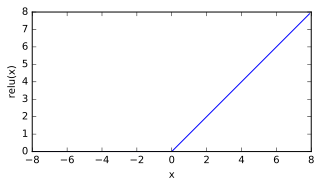

In [10]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
xyplot(x, y, 'relu')

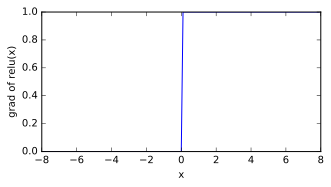

In [11]:
# ReLU的导数
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')

 ### 2. sigmoid函数
 
表达式：$\text{sigmoid}(x)) = \frac{1}{1+\text{exp}(-x)}$

描述： 早期比较常用，后逐渐被简单的ReLU取代

值域：$[0, 1]$

 sigmoid导数：$\text{sigmoid} ^{'}(x) = \text{sigmoid}(x)(1-\text{sigmoid}(x))$

值域：$[0, \frac{1}{4}]$ 


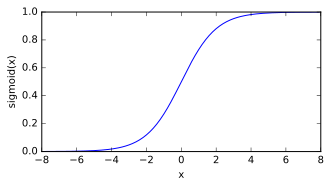

In [12]:
y = x.sigmoid()
xyplot(x, y, 'sigmoid')

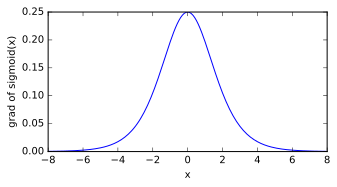

In [13]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid')

### 3.  tanh函数

表达式：$\text{tanh}(x) = \frac{1-\text{exp}(-2x)}{1+\text{exp}(-2x)}$

描述： 双曲正切

值域：$[-1, 1]$

导数：$\text{tanh} ^{'}(x) = 1- \text{tanh}^2(x)$

值域：$[0, 1]$ 


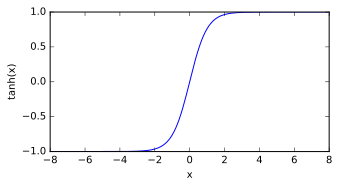

In [14]:
y = x.tanh()
xyplot(x, y, 'tanh')

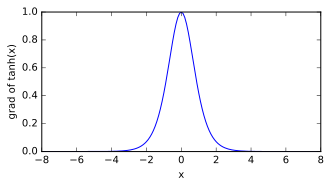

In [15]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of tanh')